<a href="https://colab.research.google.com/github/Harbim001/Image-classification-with-ML/blob/main/CMM536_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing Necessary Packages
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [ ]:
# Importing Necessary Packages
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_curve
import os
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import os
import numpy as np
import cv2
import csv

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
# Importing The Deep Learning Libraries
import keras
from keras.preprocessing import image
from keras import layers
from keras import models
from sklearn.model_selection import train_test_split
from skimage import feature
from pandas import DataFrame
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


### **Dataset Collection**

The Dataset consist of 3,615 x-ray images, which were gotten from two different sources;

* Hand & Shoulder Dataset : “MURA Dataset: Towards Radiologist-Level Abnormality Detection In Musculoskeletal Radiographs”. (n.d.). , available at: https://web.archive.org/web/20220227144734/https://stanfordmlgroup.github.io/competitions/mura/ (accessed 27 February 2022). 553 & 2,031 of hand and shoulder smaples were chosen at random from the training side of the "normal" images.

* Chest Dataset : “Chest Xray”. (n.d.). , available at: https://web.archive.org/web/20220227144913/https://www.kaggle.com/inhcngphan/chest-xray/metadata (accessed 27 February 2022). 1031 Samples were chosen at random from the training side of the "Bacteria & Phenumonia" images.

In [ ]:
# Loading The Dataset 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/My Drive/image_data

/content/drive/My Drive/image_data


###**Importing The Images, Extracting The HOG Features, And Converting The Image Repository In a Pandas Data Frame**

In [ ]:
# Defining The Class To Extract The HOG Features
class HOG:
    def __init__(self, orientations = 9, pixelsPerCell = (8, 8),
        cellsPerBlock = (3, 3), transform = False):
        self.orienations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.transform = transform

    def describe(self, image):
        # Computing HOG Tor The Image
        hist = feature.hog(image, orientations = self.orienations,
            pixels_per_cell = self.pixelsPerCell,
            cells_per_block = self.cellsPerBlock,
            transform_sqrt = self.transform)
        # Return The HOG Features
        return hist
    
hog = HOG(orientations = 18, pixelsPerCell = (10, 10), cellsPerBlock = (1, 1), transform = True)

In [ ]:
resize_factor = 100
path = '/content/drive/MyDrive/image_data'
datarepo = [] # List to append the images as 2D numpy arrays
target =  [] # List to append the target/class/label
flattenedrepo = [] # List for the flattened pixels
hogrepo = [] # List to append the HOG features
for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_factor, resize_factor)) 
                datarepo.append(img)
                flattenedrepo.append(img.flatten())
                # Extracting HOG and Appending The Flattened Image To The Pixel Repo
                hogfeatures = hog.describe(img)
                hogrepo.append(hogfeatures)
                # Append The Folders Where The Image Is To The Target List
                target.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")

# Converting The Repo List Into Pandas Dataframe
flattenedrepotarget = DataFrame(flattenedrepo)
flattenedrepotarget['class']= DataFrame(target)
flattenedrepotarget

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,class
0,57,57,57,57,57,56,58,55,56,57,...,56,57,56,58,58,58,58,59,58,Hand
1,55,55,53,55,54,57,57,56,54,54,...,53,54,53,54,54,55,55,56,57,Hand
2,0,0,41,41,41,41,41,41,42,42,...,41,41,41,41,21,0,0,0,0,Hand
3,0,0,38,38,38,38,37,37,37,38,...,41,41,41,41,41,41,41,41,0,Hand
4,32,32,32,32,32,32,32,32,32,31,...,2,2,2,2,2,2,2,2,2,Hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,42,45,48,53,60,61,62,66,67,95,...,-117,122,82,63,19,31,31,32,36,Chest
3611,-37,-82,-73,-68,-106,74,1,4,14,15,...,70,21,18,20,20,22,23,23,24,Chest
3612,-91,-93,-120,98,92,76,80,77,78,78,...,-103,120,73,69,52,5,12,15,17,Chest
3613,-46,-53,-52,-78,-98,-112,120,118,63,34,...,93,73,52,21,24,29,20,42,69,Chest



Calculating class distribution for the flattenedrepo...
      Class  Number of Samples
0     Chest               1031
1      Hand                553
2  Shoulder               2031
Total images: 3615

Showing class distribution bar chart...


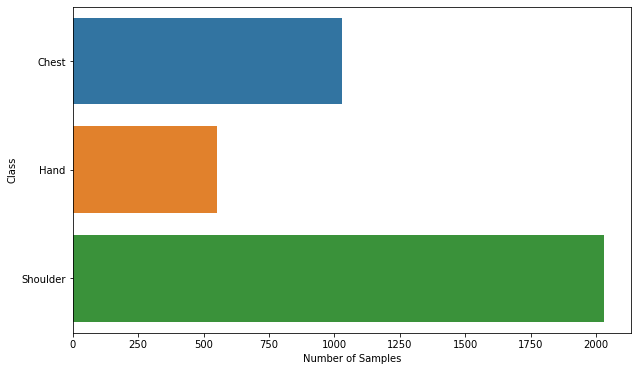

Size of target:  3615
Size of data (3615, 100, 100)
Size of flattened repository:  (3615, 10000)
Size of HOG features data structure:  (3615, 1800)


In [ ]:
print('\nCalculating class distribution for the flattenedrepo...')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(target)))):
    cont = 0
    for j, label2 in enumerate(target):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(target)])
# Converting The Repo Lists Into Numpy Arrays
flattenedrepo = np.array(flattenedrepo)
hogrepo = np.array(hogrepo)
datarepo = np.array(datarepo)
# Load As A Panda
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(target)))
# Creating An Histogram Using Seaborn
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=histo_panda)
# Save The Image
sns_plot.figure.set_size_inches(10,6)
print('\nShowing class distribution bar chart...')
plt.show()
print('Size of target: ', len(target))
print('Size of data', datarepo.shape)
print('Size of flattened repository: ', flattenedrepo.shape)
print('Size of HOG features data structure: ', hogrepo.shape)

###**Sample Image Of Each Data Repository**


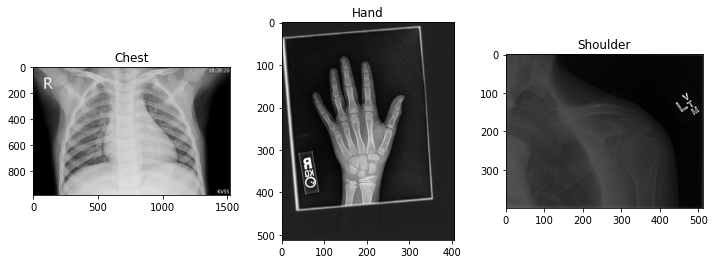

In [ ]:
img_chest = cv2.imread('Chest/person81_virus_152.jpeg', 0)
img_hand = cv2.imread('Hand/image2 (2).png', 0)
img_shoulder = cv2.imread('Shoulder/image1 (2).png', 0)

plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.imshow(img_chest, cmap = 'gray')
plt.title('Chest')
plt.subplot(1,3,2)
plt.imshow(img_hand, cmap = 'gray')
plt.title('Hand')
plt.subplot(1,3,3)
plt.imshow(img_shoulder, cmap = 'gray')
plt.title('Shoulder')
plt.show()

###**Implementing a Stratified Data Split On All Three Data Repository ( unaltered data, flattened data, hog data).**

* This invovles spliting the dataset's, where 30% of the dataset will be used for testing and 70% for training.

In [ ]:
# Original Dataset Split
data_train, data_test, targetdata_train, targetdata_test = train_test_split(datarepo,
                                                          target, test_size = 0.3,
                                                            random_state=42, stratify=target) 

# Flattened Image Dataset Split
flatteneddata_train, flatteneddata_test, targetflatteneddata_train, targetflatteneddata_test = train_test_split(flattenedrepo, 
                                                                          target, test_size=0.3, 
                                                                          random_state=42, stratify=target)
# Hog Dataset Split
hogdata_train, hogdata_test, targethogdata_train, targethogdata_test = train_test_split(hogrepo, 
                                                                          target, test_size=0.3, 
                                                                          random_state=42, stratify=target)



* There are now **2530** training samples and **1084** test samples of each dataset.

###**Class Distriution Plot For The Training And Test Dataset**




Calculating class distribution for the training set...
      Class  Number of Samples
0     Chest                722
1      Hand                387
2  Shoulder               1421
Total images: 2530

Showing class distribution bar chart for the training set...


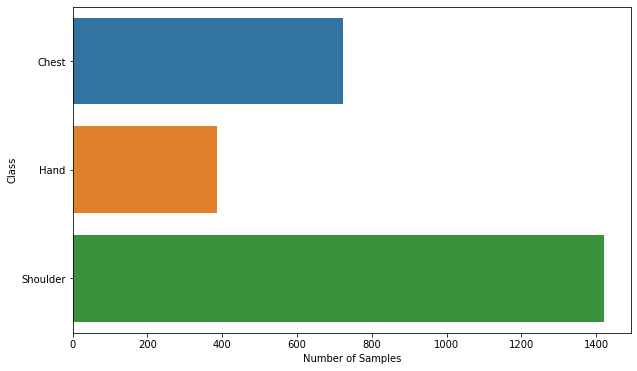

In [ ]:
# Plot For The Training Dataset

print('\nCalculating class distribution for the training set...')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(targetflatteneddata_train)))):
    cont = 0
    for j, label2 in enumerate(targetflatteneddata_train):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(targetflatteneddata_train)])
# Load As A Panda
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(targetflatteneddata_train)))
# Creating An Histogram Using Seaborn
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=histo_panda)
# Save The Image
sns_plot.figure.set_size_inches(10,6)
print('\nShowing class distribution bar chart for the training set...')
plt.show()


Calculating class distribution for the test set...
      Class  Number of Samples
0     Chest                309
1      Hand                166
2  Shoulder                610
Total images: 1085

Showing class distribution bar chart for the test set...


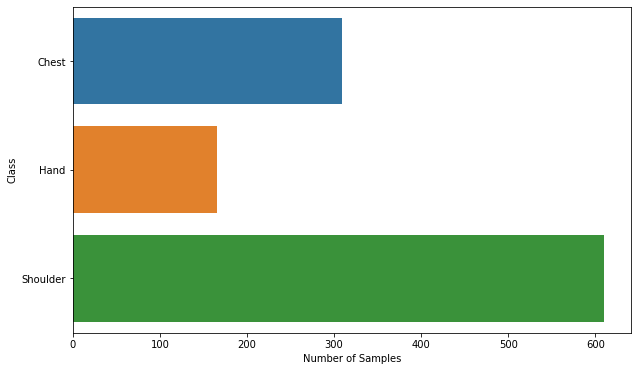

In [ ]:
# Plot For The Test Dataset

print('\nCalculating class distribution for the test set...')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(targetflatteneddata_test)))):
    cont = 0
    for j, label2 in enumerate(targetflatteneddata_test):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(targetflatteneddata_test)])
# Load As A Panda
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(targetflatteneddata_test)))
# Creating An Histogram Using Seaborn
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=histo_panda)
# Save The Image
sns_plot.figure.set_size_inches(10,6)
print('\nShowing class distribution bar chart for the test set...')
plt.show()

##**Task A**

Training the training dataset and testing on the test dataset by a convolutional neural network-based machine learning architecture CNN, using keras and tensorflow as the backend.

In [ ]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(123)
print(data_train.shape, data_test.shape)

(2530, 100, 100) (1085, 100, 100)


In [ ]:
# Preprocessing the input data

# Reshaping Into Four Dimensions.
data_train_reshape = data_train.reshape(data_train.shape[0], 100, 100, 1)
data_test_reshape = data_test.reshape(data_test.shape[0], 100, 100,  1) 

# Converting To Float 32
data_train_reshape = data_train_reshape.astype('float32')
data_test_reshape = data_test_reshape.astype('float32')

# Normalise
data_train_reshape /= 255
data_test_reshape /= 255

# Converting From Strings To Integers For Viewing
targetdata_train = pd.factorize(targetdata_train)[0].astype(np.uint8)
targetdata_test = pd.factorize(targetdata_test)[0].astype(np.uint8)

# One-hot Encoding Using keras' Numpy-related Utilities
targetdata_train_categorical = np_utils.to_categorical(targetdata_train, 3)
targetdata_test_categorical = np_utils.to_categorical(targetdata_test, 3)                       

In [ ]:
# Building A Linear Stack Of Layers With The Sequential Model

model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu')) # Adding The Input Layer 
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) # Adding The OutPut Layer

# Printing The Model Summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               9437312   
______________________________________

In [ ]:
# Compiling The Model

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

# Fitining model on the training dataset
n=2530 

model.fit(data_train_reshape[:n], targetdata_train_categorical[:n], 
          batch_size=32, epochs=5, verbose=1)


Epoch 1/5
2530/2530 [==============================] - 75s 30ms/step - loss: 0.3791 - accuracy: 0.8688
Epoch 2/5
2530/2530 [==============================] - 74s 29ms/step - loss: 0.1453 - accuracy: 0.9577
Epoch 3/5
2530/2530 [==============================] - 74s 29ms/step - loss: 0.0988 - accuracy: 0.9704
Epoch 4/5
2530/2530 [==============================] - 74s 29ms/step - loss: 0.0700 - accuracy: 0.9767
Epoch 5/5
2530/2530 [==============================] - 74s 29ms/step - loss: 0.0626 - accuracy: 0.9791


In [ ]:
# Evaluating The Model Performance On The Test Dataset
loss, accuracy = model.evaluate(data_test_reshape[:n], targetdata_test_categorical[:n], verbose=0)
print('Loss: ', loss,'\nAcc: ', accuracy)

Loss:  0.10605844022525895 
Acc:  0.9695852398872375


In [ ]:
# Checking The Labels That Have Been Predicted
Data_predict=model.predict(data_test_reshape[:n]) 
Data_classes=np.argmax(Data_predict,axis=1)
print(Data_classes)

[0 0 0 ... 0 1 0]


In [ ]:
# Printing The Classification Report

# Chest - 0
# Hand - 1
# Shoulder - 2

print(classification_report(targetdata_test,Data_classes))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       610
           1       1.00      0.99      0.99       309
           2       0.85      0.98      0.91       166

    accuracy                           0.97      1085
   macro avg       0.95      0.97      0.96      1085
weighted avg       0.97      0.97      0.97      1085



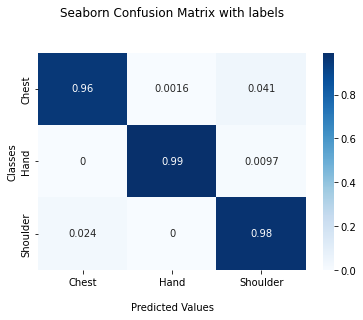

In [ ]:
cfm1 = sns.heatmap(confusion_matrix(targetdata_test, Data_classes, normalize = 'true'), annot = True, cmap = 'Blues')

cfm1.set_title('Seaborn Confusion Matrix with labels\n\n');
cfm1.set_xlabel('\nPredicted Values')
cfm1.set_ylabel('Classes');

## Ticket labels - List must be in alphabetical order
cfm1.xaxis.set_ticklabels(['Chest','Hand','Shoulder'])
cfm1.yaxis.set_ticklabels(['Chest','Hand','Shoulder'])

## Display the visualization of the Confusion Matrix.
plt.show()

###**Conclusion:**

After Training the convolutional neural network on the training dataset and evaluating its peformance on the test set which returns the **loss** and **accuracy** , which are the loss of prediction obtained on the test dataset and accuracy obtained on the test dataset. In conclusion, we can observe that sufficient precision has been achieved in classifying the images. Anyone, on the other hand, can run this model by changing the number of epochs or any other parameter.

However any conculsion drawn from this results can be considered ineffective why? because the dataset is imbalanced and it could skew the model into wrongly labeling each sample resulting to many false negatives and false positives.

##**Task B**

Performing Image Agumentation By Implenting Random undersampling On The Train Portion Of The original Dataset And Balancing The Classes To 387 Each, Creating A New Dataset With 387 Samples In Total.

In [ ]:
import imblearn
import collections
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Reshaping The Original Dataset From 3D To 2D
nsamples, nx, ny = data_train.shape
d2_data_train = data_train.reshape((nsamples,nx*ny))

# Performing Randomundersampling To The Training Dataset
rus = RandomUnderSampler(random_state=42, replacement=True)
data_rus, target_rus = rus.fit_resample(d2_data_train, targetdata_train )

# Summarize Loaded Dataset
print('original dataset shape:', Counter(targetdata_train))
print('Resample dataset shape', Counter(target_rus))

# Summarize Loaded Dataset
print('Size of RUS augmented repository: ', data_rus.shape)
print('Example of the RUS augmented repository: ')
print(data_rus)

original dataset shape: Counter({0: 1421, 1: 722, 2: 387})
Resample dataset shape Counter({0: 387, 1: 387, 2: 387})
Size of RUS augmented repository:  (1161, 10000)
Example of the RUS augmented repository: 
[[52 44 35 ... 77 77 79]
 [ 1  1  1 ...  4  5  7]
 [69 62 61 ...  0  0  6]
 ...
 [28 26 25 ... 24 28 28]
 [32 29 31 ... 31 31 28]
 [ 5  4  4 ...  4  4  4]]


In [ ]:
# Converting From Strings To Integers For Viewing

# Implemennting A 70-30 Stratified Split
import numpy as np
from sklearn.model_selection import train_test_split
datarepo_train, datarepo_test, target_rus_train, target_rus_test = train_test_split(data_rus, target_rus, stratify=target_rus, test_size=0.3)
print(np.count_nonzero(target_rus_train == 0),np.count_nonzero(target_rus_train == 1),np.count_nonzero(target_rus_train == 2))
print(np.count_nonzero(target_rus_test == 0),np.count_nonzero(target_rus_test == 1),np.count_nonzero(target_rus_test == 2))

271 271 270
116 116 117


In [ ]:
# Training The SVM model With A Linear Kernel
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [ ]:
# Fitining Model On The Training Dataset
clf = model.fit(datarepo_train, target_rus_train)

In [ ]:
# Testing The Model On The Test Dataset
target_rus_predicted = model.predict(datarepo_test)
print(target_rus_predicted)

[2 0 2 2 0 2 1 0 1 2 2 2 2 2 1 2 1 1 2 2 2 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 2
 0 1 0 1 1 2 1 2 0 1 2 2 0 1 0 0 0 2 2 0 0 2 0 2 1 0 0 1 1 1 2 0 1 0 1 2 0
 1 0 0 0 0 1 0 2 2 2 1 2 1 1 0 0 1 0 2 0 1 2 1 0 0 0 2 0 1 0 0 0 2 0 0 0 1
 1 0 2 0 2 1 2 2 1 1 2 1 0 2 1 2 0 0 2 0 0 2 0 1 1 2 1 2 2 0 2 1 1 1 1 0 2
 1 0 1 0 1 0 0 0 1 1 0 0 0 2 1 1 1 1 0 2 0 0 2 1 2 0 1 2 1 2 1 2 2 0 2 0 0
 1 1 0 1 1 1 1 2 0 1 0 2 0 2 2 0 2 1 1 1 0 2 1 0 0 1 0 2 0 2 2 0 1 2 1 1 0
 2 1 2 1 2 2 2 0 0 1 1 0 2 2 2 1 1 0 2 1 0 1 0 1 2 0 0 2 2 1 1 2 2 0 0 2 1
 0 0 2 2 2 2 1 0 1 1 2 2 2 1 1 2 2 2 2 0 0 0 0 0 2 0 2 2 0 2 0 0 0 1 0 1 2
 2 2 1 2 1 2 1 0 1 2 2 1 2 1 2 0 0 1 2 2 2 2 1 2 1 0 0 0 1 0 2 1 0 0 1 1 1
 2 1 1 2 2 1 0 1 1 0 1 1 0 0 1 0]


In [ ]:
# Printing The Model's Accuracy
comparison = target_rus_predicted == target_rus_test
print('Accuracy', sum(comparison)/len(comparison))

Accuracy 0.8911174785100286


In [ ]:
# Printing The Classification Report

# Chest - 0
# Hand - 1
# Shoulder - 2

print(classification_report(target_rus_test,target_rus_predicted))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       116
           1       1.00      1.00      1.00       116
           2       0.85      0.82      0.83       117

    accuracy                           0.89       349
   macro avg       0.89      0.89      0.89       349
weighted avg       0.89      0.89      0.89       349



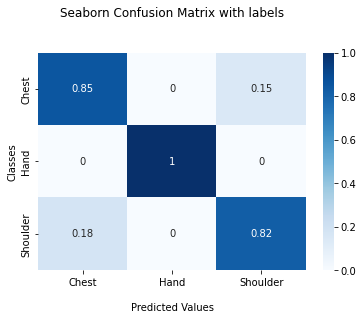

In [ ]:
## Plotting The Confusion Matrix
cfm2 = sns.heatmap(confusion_matrix(target_rus_test, target_rus_predicted, normalize = 'true'), annot = True, cmap = 'Blues')


cfm2.set_title('Seaborn Confusion Matrix with labels\n\n');
cfm2.set_xlabel('\nPredicted Values')
cfm2.set_ylabel('Classes');

## Ticket labels - List must be in alphabetical order
cfm2.xaxis.set_ticklabels(['Chest','Hand','Shoulder'])
cfm2.yaxis.set_ticklabels(['Chest','Hand','Shoulder'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [ ]:
# converting the test set labels into categorical (one-hot encoded) labels
target_rus_test = to_categorical(target_rus_test, num_classes = 3)
# getting the predicted probabilities of the Test Set Images
target_rus_test_prob = clf.decision_function(datarepo_test)

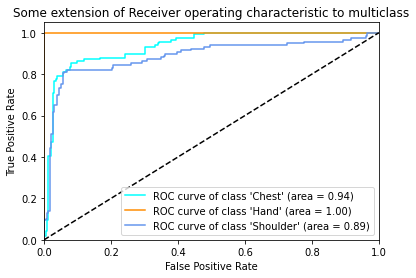

In [ ]:
from itertools import cycle

classes = ["'Chest'", "'Hand'", "'Shoulder'"]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(target_rus_test [:, i], target_rus_test_prob [:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(3), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

###**Conclusion:**

Compared to training the classification model on an imbalanced dataset in the first task, the dataset as been balanced using random undersampling. Creating a dataset sutable for an effective classification. By applying an SVM model for classification an accuracy of 90% was gotten.However there as some cons to implmenting random undersampling on a dataset;

* Loss of potentially important data is particularly true with random undersampling when events are removed without any consideration for what they are and how useful they might be to the analysis.

* Sample of the majority class chosen could be biased.

Therefore the accuracy of the model is not so reliable.

##**Task C**

Classification Of The Test Portion Of The HGO Dataset Before Agumentation, Using NN(neural network) Model.

In [ ]:
 # HOG Dataset 
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(123)
print(hogdata_train.shape, hogdata_test.shape)

(2530, 1800) (1085, 1800)


In [ ]:
# Converting The image to "float32"
hogdata_train = hogdata_train.astype('float32')
hogdata_test  = hogdata_test.astype('float32')

# Normalizing The Data To Help With The Training
hogdata_train /= 255
hogdata_test /= 255

# Converting From Strings To Integers For Viewing
targethogdata_train = pd.factorize(targethogdata_train)[0].astype(np.uint8)
targethogdata_test = pd.factorize(targethogdata_test)[0].astype(np.uint8)

# One-hot Encoding Using keras' Numpy-related Utilities
n_classes = 3
targethogdata_train_categorical = np_utils.to_categorical(targethogdata_train, n_classes)
targethogdata_test_categorical = np_utils.to_categorical(targethogdata_test, n_classes)

In [ ]:
# Building A Linear Stack Of Layers With The Sequential Model

model = Sequential()
model.add(Dense(128, input_shape=(1800,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# looking at the model summary
model.summary()

# Compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               230528    
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 27        
Total params: 231,587
Trainable params: 231,587
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitining model on the training dataset
n=2530 

model.fit(hogdata_train[:n], targethogdata_train_categorical[:n], 
          batch_size=32, epochs=5, verbose=1)

Epoch 1/5
2530/2530 [==============================] - 1s 204us/step - loss: 0.1530 - accuracy: 0.9613
Epoch 2/5
2530/2530 [==============================] - 1s 201us/step - loss: 0.1425 - accuracy: 0.9664
Epoch 3/5
2530/2530 [==============================] - 1s 210us/step - loss: 0.1358 - accuracy: 0.9672
Epoch 4/5
2530/2530 [==============================] - 1s 198us/step - loss: 0.1298 - accuracy: 0.9628
Epoch 5/5
2530/2530 [==============================] - 1s 209us/step - loss: 0.1269 - accuracy: 0.9648


In [ ]:
# Evaluating On The Test Dataset
loss, accuracy = model.evaluate(hogdata_test[:n], targethogdata_test_categorical[:n], verbose=0)

# Obtaining The 'Loss' And 'Accuracy'
print('Loss: ', loss,'\nAcc: ', accuracy)

Loss:  0.1113061866521286 
Acc:  0.9723502397537231


In [ ]:
# Checking The labels That Have Been Predicted
hog_predict=model.predict(hogdata_test[:n]) 
hog_classes=np.argmax(hog_predict,axis=1)
print(hog_classes)

[0 0 0 ... 0 1 0]


In [ ]:
# Printing The Classification Report

# Chest - 0
# Hand - 1
# Shoulder - 2
print(classification_report(targethogdata_test,hog_classes))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       610
           1       0.98      1.00      0.99       309
           2       0.95      0.89      0.92       166

    accuracy                           0.97      1085
   macro avg       0.97      0.96      0.96      1085
weighted avg       0.97      0.97      0.97      1085



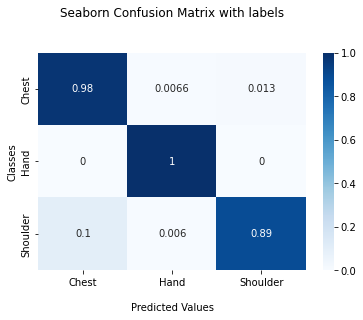

In [ ]:
cfm3 = sns.heatmap(confusion_matrix(targethogdata_test, hog_classes, normalize = 'true'), annot = True, cmap = 'Blues')

cfm3.set_title('Seaborn Confusion Matrix with labels\n\n');
cfm3.set_xlabel('\nPredicted Values')
cfm3.set_ylabel('Classes');

## Ticket labels - List must be in alphabetical order
cfm3.xaxis.set_ticklabels(['Chest','Hand','Shoulder'])
cfm3.yaxis.set_ticklabels(['Chest','Hand','Shoulder'])

## Display the visualization of the Confusion Matrix.
plt.show()

###**Conculsion:**

A NN model was implemented to train on the training dataset of the Hog repository and test on the test set an accuracy of 97% after running the model a couple of times.

Histogram of oriented gradients improves the performance of a model, one can conclude that the accuracy score is a good one.

##**Task D**

Balancing The HOG Dataset using Random Over Sampling And Classifying The Using A Linear SVM Model. Creating A New Dataset With 1421 Number Of Samples Each.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
hogrepo_ros, targethog_ros = ros.fit_resample(hogdata_train,targethogdata_train)

In [ ]:
arr = targethog_ros
new_arr = np.zeros(shape = arr.shape, dtype=str)

new_arr[(arr>=0)] = 'CHEST'
new_arr[(arr>=1)] = 'HAND'
new_arr[(arr>=2)] = 'SHOULDER'

targethog_ros = new_arr.tolist()


Calculating class distribution (after ROS)...
  Class  Number of Samples
0     C               1421
1     H               1421
2     S               1421
Total images: 4263

Showing class distribution bar chart (after ROS)...


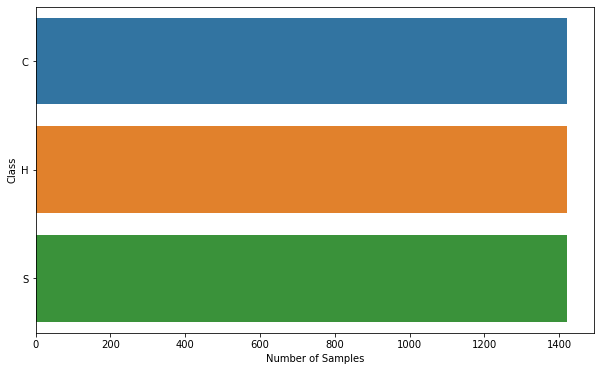

Size of ROS augmented target:  4263
Size of ROS augmented repository:  (4263, 1800)
Example of the ROS augmented repository: 
[[1.2913861e-03 1.9729047e-04 1.2913861e-03 ... 7.8750565e-04
  1.2963300e-03 0.0000000e+00]
 [1.6248052e-03 0.0000000e+00 0.0000000e+00 ... 1.1318820e-03
  7.1655837e-04 0.0000000e+00]
 [2.4342299e-03 1.3349556e-03 5.6657093e-05 ... 0.0000000e+00
  1.1074946e-03 3.1026904e-04]
 ...
 [1.5014821e-05 0.0000000e+00 3.6464568e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.3049793e-03 0.0000000e+00 1.1135933e-03 ... 2.8799253e-04
  0.0000000e+00 0.0000000e+00]
 [2.7212708e-03 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.7579148e-03]]


In [ ]:
print('\nCalculating class distribution (after ROS)...')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(targethog_ros)))):
    cont = 0
    for j, label2 in enumerate(targethog_ros):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(targethog_ros)])
## Convert histo into a panda dataframe
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(targethog_ros)))
## Create a histogram using seaborn
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=histo_panda)
## Save the image
sns_plot.figure.set_size_inches(10,6)
print('\nShowing class distribution bar chart (after ROS)...')
plt.show()

print('Size of ROS augmented target: ', len(targethog_ros))
print('Size of ROS augmented repository: ', hogrepo_ros.shape)
print('Example of the ROS augmented repository: ')
print(hogrepo_ros)

In [ ]:
# Converting From Strings To Integers For Viewing
targethog_ros = pd.factorize(targethog_ros)[0].astype(np.uint8)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Implemennting A 70-30 Stratified Split
hogrepo_train, hogrepo_test, target_ros_train, target_ros_test = train_test_split(hogrepo_ros, targethog_ros, stratify=targethog_ros, test_size=0.3)

# Summarize Split Dataset
print('training dataset shape :', Counter(target_ros_train))
print('test dataset shape :', Counter(target_ros_test))

training dataset shape : Counter({0: 995, 1: 995, 2: 994})
test dataset shape : Counter({2: 427, 0: 426, 1: 426})


In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel = 'linear', random_state = 1234)
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
# grid-search hyper-parameter tuning 
grid_search = GridSearchCV(param_grid = parameters, estimator = clf, cv = 3, verbose = 3)

In [ ]:
grid_search = grid_search.fit(hogrepo_train, target_ros_train) # 3-fold GridSearch Cross Validation

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ...........................C=0.001;, score=0.917 total time=  11.1s
[CV 2/3] END ...........................C=0.001;, score=0.333 total time=  12.1s
[CV 3/3] END ...........................C=0.001;, score=0.333 total time=  13.1s
[CV 1/3] END ............................C=0.01;, score=0.917 total time=  11.9s
[CV 2/3] END ............................C=0.01;, score=0.333 total time=  11.8s
[CV 3/3] END ............................C=0.01;, score=0.333 total time=  11.7s
[CV 1/3] END .............................C=0.1;, score=0.917 total time=  11.4s
[CV 2/3] END .............................C=0.1;, score=0.333 total time=  11.6s
[CV 3/3] END .............................C=0.1;, score=0.333 total time=  12.0s
[CV 1/3] END ...............................C=1;, score=0.917 total time=  13.8s
[CV 2/3] END ...............................C=1;, score=0.333 total time=  12.2s
[CV 3/3] END ...............................C=1;,

In [ ]:
grid_search.best_params_ # finding best set of hyper-parameters

{'C': 100}

In [ ]:
# training Linear SVM Model with best hyper-parameter, C = 100
clf = SVC(C = 100, kernel = 'linear', random_state = 1234).fit(hogrepo_train, target_ros_train)

In [ ]:
target_ros_pred = clf.predict(hogrepo_test) # getting the predictions for the Test Set Images

In [ ]:
print('Training Accuracy: ', accuracy_score(target_ros_train, clf.predict(hogrepo_train)))
print('Test Accuracy: ', accuracy_score(target_ros_test , target_ros_pred))

Training Accuracy:  0.9668230563002681
Test Accuracy:  0.9687255668491008


In [ ]:
print(classification_report(target_ros_test , target_ros_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       426
           1       1.00      1.00      1.00       426
           2       0.96      0.95      0.95       427

    accuracy                           0.97      1279
   macro avg       0.97      0.97      0.97      1279
weighted avg       0.97      0.97      0.97      1279



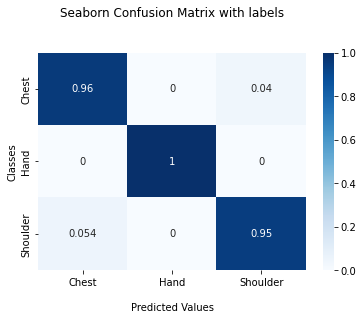

In [ ]:
cfm4 = sns.heatmap(confusion_matrix(target_ros_test, target_ros_pred, normalize = 'true'), annot = True, cmap = 'Blues')

cfm4.set_title('Seaborn Confusion Matrix with labels\n\n');
cfm4.set_xlabel('\nPredicted Values')
cfm4.set_ylabel('Classes');

## Ticket labels - List must be in alphabetical order
cfm4.xaxis.set_ticklabels(['Chest','Hand','Shoulder'])
cfm4.yaxis.set_ticklabels(['Chest','Hand','Shoulder'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# converting the test set labels into categorical (one-hot encoded) labels
target_ros_test = to_categorical(target_ros_test, num_classes = 3)
# getting the predicted probabilities of the Test Set Images
target_ros_test_prob = clf.decision_function(hogrepo_test)

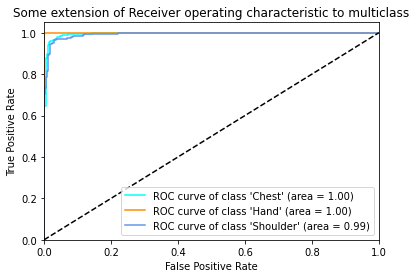

In [ ]:
from itertools import cycle

classes = ["'Chest'", "'Hand'", "'Shoulder'"]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(target_ros_test[:, i], target_ros_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(3), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

###**Conculsion:**

An accuracy of 96% is gotten on both the test and training dataset, after implementing an SVM model. The peformance of the model was improved by choosing the best hyperparameter. 96% is a good number, however the HOG dataset as been balanced using random oversampling which is an alternative method to random undersampling used in task b, which can be a reason to second guess the accuracy of the classification why? it doesn’t neccesary lead to any loss of information, and in some cases, may perform better than undersampling. But oversampling isn’t perfect either. Because oversampling often involves replicating minority events, it can lead to overfitting.

Also SVM generally do not suffer condition of overfitting and performs well when there is a clear indication of separation between classes but our classes are balanced which gives room for doubt, if more time was given to training other classification models and compare each results against themselves one might eventually find the best model.